# Laplacian Convolutional Representation (LCR)

## Evaluate Empirical Time Complexity

In [1]:
import numpy as np

def compute_mape(var, var_hat):
    return np.sum(np.abs(var - var_hat) / var) / var.shape[0]

def compute_rmse(var, var_hat):
    return np.sqrt(np.sum((var - var_hat) ** 2) / var.shape[0])

def laplacian(n, tau):
    ell = np.zeros(n)
    ell[0] = 2 * tau
    for k in range(tau):
        ell[k + 1] = -1
        ell[-k - 1] = -1
    return ell

def prox(z, w, lmbda, denominator):
    T = z.shape[0]
    temp1 = np.fft.fft(lmbda * z - w) / denominator
    temp2 = 1 - T / (denominator * np.abs(temp1))
    temp2[temp2 <= 0] = 0
    return np.fft.ifft(temp1 * temp2).real

def update_z(y_train, pos_train, x, w, lmbda, eta):
    z = x + w / lmbda
    z[pos_train] = (lmbda / (lmbda + eta) * z[pos_train] 
                    + eta / (lmbda + eta) * y_train)
    return z

def update_w(x, z, w, lmbda):
    return w + lmbda * (x - z)

def LCR(y_true, y, lmbda, gamma, tau, maxiter = 50):
    eta = 100 * lmbda
    T = y.shape
    pos_train = np.where(y != 0)
    y_train = y[pos_train]
    pos_test = np.where((y_true != 0) & (y == 0))
    y_test = y_true[pos_test]
    z = y.copy()
    w = y.copy()
    ell = np.fft.fft(laplacian(T, tau))
    denominator = lmbda + gamma * np.abs(ell) ** 2
    del y_true, y
    show_iter = 100
    for it in range(maxiter):
        x = prox(z, w, lmbda, denominator)
        z = update_z(y_train, pos_train, x, w, lmbda, eta)
        w = update_w(x, z, w, lmbda)
        if (it + 1) % show_iter == 0:
            print(it + 1)
            print(compute_mape(y_test, x[pos_test]))
            print(compute_rmse(y_test, x[pos_test]))
            print()
    return x

#### Generate Data of Length $2^{10},2^{11},\ldots,x^{20}$

In [2]:
import numpy as np
np.random.seed(1)
import time

tau = 2
t = 0
time_mat = np.zeros((11, 10))
for power in range(10, 21, 1):
    print('Power = {}'.format(power))
    T = 2 ** power
    y = np.random.randn(T)
    lmbda = 5e-3 * T
    gamma = 2 * lmbda
    for i in range(10):
        start = time.time() * 1000
        x = LCR(y, y, lmbda, gamma, tau)
        end = time.time() * 1000
        time_mat[t, i] = end - start
        print('Running time: %d milliseconds.'%(time_mat[t, i]))
        print()
    t += 1
print(time_mat)

Power = 10
Running time: 6 milliseconds.

Running time: 8 milliseconds.

Running time: 3 milliseconds.

Running time: 3 milliseconds.

Running time: 3 milliseconds.

Running time: 2 milliseconds.

Running time: 2 milliseconds.

Running time: 1 milliseconds.

Running time: 1 milliseconds.

Running time: 2 milliseconds.

Power = 11
Running time: 3 milliseconds.

Running time: 3 milliseconds.

Running time: 3 milliseconds.

Running time: 3 milliseconds.

Running time: 3 milliseconds.

Running time: 3 milliseconds.

Running time: 3 milliseconds.

Running time: 2 milliseconds.

Running time: 2 milliseconds.

Running time: 2 milliseconds.

Power = 12
Running time: 4 milliseconds.

Running time: 4 milliseconds.

Running time: 4 milliseconds.

Running time: 4 milliseconds.

Running time: 3 milliseconds.

Running time: 3 milliseconds.

Running time: 3 milliseconds.

Running time: 3 milliseconds.

Running time: 3 milliseconds.

Running time: 3 milliseconds.

Power = 13
Running time: 7 millisecon

#### Draw Empirical Time Complexity

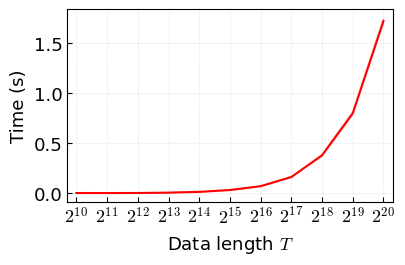

In [3]:
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 13
plt.rcParams['mathtext.fontset'] = 'cm'

fig = plt.figure(figsize = (4.2, 2.5))
ax = fig.add_subplot(1, 1, 1)

power = time_mat.shape[0]
plt.plot(np.mean(time_mat, axis = 1) / 1000, color = 'r')
lower_error = np.mean(time_mat / 1000, axis = 1) - np.std(time_mat / 1000, axis = 1)
upper_error = np.mean(time_mat / 1000, axis = 1) + np.std(time_mat / 1000, axis = 1)
x = np.append(0, np.append(np.arange(0, power), np.flip(np.arange(0, power))))
y = np.append(upper_error[0], np.append(lower_error, np.flip(upper_error)))
plt.fill(x, y, color = 'r', alpha = 0.15)

plt.xlim([-0.3, 10.3])
plt.xlabel(r'Data length $T$')
plt.ylabel('Time (s)')
labels = [r'$2^{10}$', r'$2^{11}$', r'$2^{12}$', r'$2^{13}$',
          r'$2^{14}$', r'$2^{15}$', r'$2^{16}$', r'$2^{17}$',
          r'$2^{18}$', r'$2^{19}$', r'$2^{20}$']
plt.xticks(np.arange(0, 11), labels)
# plt.yticks(np.arange(0, 10, 2))
ax.tick_params(direction = "in")
ax.tick_params(which = 'minor', direction = "in")
ax.grid(color='gray', linestyle='dashed', linewidth=0.5, alpha=0.2)
plt.show()
fig.savefig("empirical_time_complexity_curve.pdf", bbox_inches = "tight")

## Univariate Time Series Imputation

### Traffic Speed

In [ ]:
import numpy as np

def compute_mape(var, var_hat):
    return np.sum(np.abs(var - var_hat) / var) / var.shape[0]

def compute_rmse(var, var_hat):
    return np.sqrt(np.sum((var - var_hat) ** 2) / var.shape[0])

def laplacian(n, tau):
    ell = np.zeros(n)
    ell[0] = 2 * tau
    for k in range(tau):
        ell[k + 1] = -1
        ell[-k - 1] = -1
    return ell

def prox(z, w, lmbda, denominator):
    T = z.shape[0]
    temp1 = np.fft.fft(lmbda * z - w) / denominator
    temp2 = 1 - T / (denominator * np.abs(temp1))
    temp2[temp2 <= 0] = 0
    return np.fft.ifft(temp1 * temp2).real

def update_z(y_train, pos_train, x, w, lmbda, eta):
    z = x + w / lmbda
    z[pos_train] = (lmbda / (lmbda + eta) * z[pos_train] 
                    + eta / (lmbda + eta) * y_train)
    return z

def update_w(x, z, w, lmbda):
    return w + lmbda * (x - z)

def LCR(y_true, y, lmbda, gamma, tau, maxiter = 50):
    eta = 100 * lmbda
    T = y.shape
    pos_train = np.where(y != 0)
    y_train = y[pos_train]
    pos_test = np.where((y_true != 0) & (y == 0))
    y_test = y_true[pos_test]
    z = y.copy()
    w = y.copy()
    ell = np.fft.fft(laplacian(T, tau))
    denominator = lmbda + gamma * np.abs(ell) ** 2
    del y_true, y
    show_iter = 10
    for it in range(maxiter):
        x = prox(z, w, lmbda, denominator)
        z = update_z(y_train, pos_train, x, w, lmbda, eta)
        w = update_w(x, z, w, lmbda)
        if (it + 1) % show_iter == 0:
            print(it + 1)
            print(compute_mape(y_test, x[pos_test]))
            print(compute_rmse(y_test, x[pos_test]))
            print()
    return x

#### Fully Observed Time Series

In [ ]:
import numpy as np
np.random.seed(1)
import time

missing_rate = 0.0
print('Missing rate = {}'.format(missing_rate))

dense_mat = np.load('../datasets/Portland-data-set/speed.npy')
d = 3
dense_vec = dense_mat[0, : 96 * d]
T = dense_vec.shape[0]
sparse_vec = dense_vec * np.round(np.random.rand(T) + 0.5 - missing_rate)

import time
start = time.time()
lmbda = 1e-2 * T
gamma = 5 * lmbda
tau = 2
maxiter = 100
x = LCR(dense_vec, sparse_vec, lmbda, gamma, tau, maxiter)
end = time.time()
print('Running time: %d seconds.'%(end - start))

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 13})

fig = plt.figure(figsize = (7.5, 2.2))
ax = fig.add_subplot(111)
plt.plot(dense_vec[: 96 * d], 'dodgerblue', linewidth = 1)
plt.plot(x[: 96 * d], 'red', linewidth = 3)
plt.xlabel('Time')
plt.ylabel('Speed (mph)')
plt.xlim([0, 96 * d])
plt.ylim([54, 65])
plt.xticks(np.arange(0, 96 * d + 1, 24))
plt.yticks(np.arange(54, 66, 2))
plt.grid(linestyle = '-.', linewidth = 0.5)
ax.tick_params(direction = 'in')

plt.savefig('speeds_{}.pdf'.format(round(missing_rate * 100)), 
            bbox_inches = "tight")
plt.show()

#### 80% Missing Data

In [ ]:
import numpy as np
np.random.seed(1)
import time

missing_rate = 0.8
print('Missing rate = {}'.format(missing_rate))

dense_mat = np.load('../datasets/Portland-data-set/speed.npy')
d = 3
dense_vec = dense_mat[0, : 96 * d]
T = dense_vec.shape[0]
sparse_vec = dense_vec * np.round(np.random.rand(T) + 0.5 - missing_rate)

import time
start = time.time()
lmbda = 1e-2 * T
gamma = 5 * lmbda
tau = 2
maxiter = 100
x = LCR(dense_vec, sparse_vec, lmbda, gamma, tau, maxiter)
end = time.time()
print('Running time: %d seconds.'%(end - start))

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 13})

fig = plt.figure(figsize = (7.5, 2.2))
ax = fig.add_subplot(111)
plt.plot(dense_vec[: 96 * d], 'dodgerblue', linewidth = 1)
plt.plot(np.arange(0, 96 * d), sparse_vec[: 96 * d], 'o', 
         markeredgecolor = 'darkblue', alpha = missing_rate,
         markerfacecolor = 'deepskyblue', markersize = 10)
plt.plot(x[: 96 * d], 'red', linewidth = 4)
plt.xlabel('Time')
plt.ylabel('Speed (mph)')
plt.xlim([0, 96 * d])
plt.ylim([54, 65])
plt.xticks(np.arange(0, 96 * d + 1, 24))
plt.yticks(np.arange(54, 66, 2))
plt.grid(linestyle = '-.', linewidth = 0.5)
ax.tick_params(direction = 'in')

plt.savefig('speeds_{}.pdf'.format(round(missing_rate * 100)), 
            bbox_inches = "tight")
plt.show()

#### 90% Missing Data

In [ ]:
import numpy as np
np.random.seed(1)
import time

missing_rate = 0.9
print('Missing rate = {}'.format(missing_rate))

dense_mat = np.load('../datasets/Portland-data-set/speed.npy')
d = 3
dense_vec = dense_mat[0, : 96 * d]
T = dense_vec.shape[0]
sparse_vec = dense_vec * np.round(np.random.rand(T) + 0.5 - missing_rate)

import time
start = time.time()
lmbda = 1e-2 * T
gamma = 5 * lmbda
tau = 2
maxiter = 100
x = LCR(dense_vec, sparse_vec, lmbda, gamma, tau, maxiter)
end = time.time()
print('Running time: %d seconds.'%(end - start))

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 13})

fig = plt.figure(figsize = (7.5, 2.2))
ax = fig.add_subplot(111)
plt.plot(dense_vec[: 96 * d], 'dodgerblue', linewidth = 1)
plt.plot(np.arange(0, 96 * d), sparse_vec[: 96 * d], 'o', 
         markeredgecolor = 'darkblue', alpha = missing_rate,
         markerfacecolor = 'deepskyblue', markersize = 10)
plt.plot(x[: 96 * d], 'red', linewidth = 4)
plt.xlabel('Time')
plt.ylabel('Speed (mph)')
plt.xlim([0, 96 * d])
plt.ylim([54, 65])
plt.xticks(np.arange(0, 96 * d + 1, 24))
plt.yticks(np.arange(54, 66, 2))
plt.grid(linestyle = '-.', linewidth = 0.5)
ax.tick_params(direction = 'in')

plt.savefig('speeds_{}.pdf'.format(round(missing_rate * 100)), 
            bbox_inches = "tight")
plt.show()

#### 95% Missing Data

In [ ]:
import numpy as np
np.random.seed(1)
import time

missing_rate = 0.95
print('Missing rate = {}'.format(missing_rate))

dense_mat = np.load('../datasets/Portland-data-set/speed.npy')
d = 3
dense_vec = dense_mat[0, : 96 * d]
T = dense_vec.shape[0]
sparse_vec = dense_vec * np.round(np.random.rand(T) + 0.5 - missing_rate)

lmbda = 1e-2 * T
gamma = 5 * lmbda
tau = 2
maxiter = 100
x = LCR(dense_vec, sparse_vec, lmbda, gamma, tau, maxiter)

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 13})

fig = plt.figure(figsize = (7.5, 2.2))
ax = fig.add_subplot(111)
plt.plot(dense_vec[: 96 * d], 'dodgerblue', linewidth = 1)
plt.plot(x[: 96 * d], 'red', linewidth = 3)
plt.plot(np.arange(0, 96 * d), sparse_vec[: 96 * d], 'o', 
         markeredgecolor = 'darkblue', 
         markerfacecolor = 'deepskyblue', markersize = 10)
plt.xlabel('Time')
plt.ylabel('Speed (mph)')
plt.xlim([0, 96 * d])
plt.ylim([54, 65])
plt.xticks(np.arange(0, 96 * d + 1, 24))
plt.yticks(np.arange(54, 66, 2))
plt.grid(linestyle = '-.', linewidth = 0.5)
ax.tick_params(direction = 'in')

plt.savefig('speeds_{}.pdf'.format(round(missing_rate * 100)), 
            bbox_inches = "tight")
plt.show()

### Traffic Volume

#### 95% Missing Data

In [ ]:
import numpy as np
np.random.seed(1)
import time

missing_rate = 0.95
print('Missing rate = {}'.format(missing_rate))

dense_mat = np.load('../datasets/Portland-data-set/volume.npy')
d = 3
dense_vec = dense_mat[0, : 96 * d]
T = dense_vec.shape[0]
sparse_vec = dense_vec * np.round(np.random.rand(T) + 0.5 - missing_rate)

lmbda = 1e-2 * T
gamma = 5 * lmbda
tau = 2
maxiter = 100
x = LCR(dense_vec, sparse_vec, lmbda, gamma, tau, maxiter)

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})

fig = plt.figure(figsize = (5.5, 2.4))
ax = fig.add_subplot(111)
plt.plot(dense_vec[: 96 * d], 'dodgerblue', linewidth = 1.5)
plt.plot(x[: 96 * d], 'red', linewidth = 3)
pos = np.where(sparse_vec != 0)
plt.plot(pos[0], sparse_vec[pos], 'o', 
         markeredgecolor = 'darkblue', 
         markerfacecolor = 'deepskyblue', markersize = 10)
plt.xlabel('Time')
plt.ylabel('Volume')
plt.xticks(np.arange(0, 96 * d + 1, 48))
plt.xlim([0, 96 * d])
plt.yticks(np.arange(0, 301, 100))
plt.ylim([0, 300])
plt.grid(linestyle = '-.', linewidth = 0.5)
ax.tick_params(direction = 'in')

plt.savefig('volumes_95.pdf', bbox_inches = "tight")
plt.show()

## Test LCR on Multivariate Time Series

In [ ]:
import numpy as np

def compute_mape(var, var_hat):
    return np.sum(np.abs(var - var_hat) / var) / var.shape[0]

def compute_rmse(var, var_hat):
    return np.sqrt(np.sum((var - var_hat) ** 2) / var.shape[0])

def laplacian(n, tau):
    ell = np.zeros(n)
    ell[0] = 2 * tau
    for k in range(tau):
        ell[k + 1] = -1
        ell[-k - 1] = -1
    return ell

def prox(z, w, lmbda, denominator):
    T = z.shape[1]
    temp1 = np.fft.fft(lmbda * z - w, axis = 1) / denominator
    temp2 = 1 - T / (denominator * np.abs(temp1))
    temp2[temp2 <= 0] = 0
    return np.fft.ifft(temp1 * temp2, axis = 1).real

def update_z(y_train, pos_train, x, w, lmbda, eta):
    z = x + w / lmbda
    z[pos_train] = (lmbda / (lmbda + eta) * z[pos_train] 
                    + eta / (lmbda + eta) * y_train)
    return z

def update_w(x, z, w, lmbda):
    return w + lmbda * (x - z)

def LCR(y_true, y, lmbda, gamma, tau, maxiter = 50):
    eta = 100 * lmbda
    N, T = y.shape
    pos_train = np.where(y != 0)
    y_train = y[pos_train]
    pos_test = np.where((y_true != 0) & (y == 0))
    y_test = y_true[pos_test]
    z = y.copy()
    w = y.copy()
    ell = np.fft.fft(laplacian(T, tau))
    denominator = lmbda + gamma * np.abs(ell) ** 2
    del y_true, y
    show_iter = 10
    for it in range(maxiter):
        x = prox(z, w, lmbda, denominator)
        z = update_z(y_train, pos_train, x, w, lmbda, eta)
        w = update_w(x, z, w, lmbda)
        if (it + 1) % show_iter == 0:
            print(it + 1)
            print(compute_mape(y_test, x[pos_test]))
            print(compute_rmse(y_test, x[pos_test]))
            print()
    return x

In [ ]:
import numpy as np
np.random.seed(1)
import time

missing_rate = 0.9
print('Missing rate = {}'.format(missing_rate))

dense_mat = np.load('../datasets/Portland-data-set/speed.npy')
N, T = dense_mat.shape
sparse_mat = dense_mat * np.round(np.random.rand(N, T) + 0.5 - missing_rate)

import time
start = time.time()
lmbda = 1e-2 * T
gamma = 5 * lmbda
tau = 2
maxiter = 100
x = LCR(dense_mat, sparse_mat, lmbda, gamma, tau, maxiter)
end = time.time()
print('Running time: %d seconds.'%(end - start))

### License

<div class="alert alert-block alert-danger">
<b>This work is released under the MIT license.</b>
</div>